우선, `sklearn`에서 SVM을 어떻게 사용하면 되는지 iris data로 간단히 살펴봅시다!  
아래는 SVM에서 조절할 수 있는 파라미터들입니다. 세션에서 공부한 주요 파라미터들은 `kernel`, `C`, `gamma(related to kernel)`이 되겠죠?    
`sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.0, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None)
`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features.
y = iris.target

In [5]:
# Create an instance of SVM and fit out data. 
# We do not scale the data since we want to plot the support vectors.
svc = svm.SVC(kernel='linear').fit(X, y)

**visualization**  
\* plt.cm.rainbow를 다른 colormap으로 바꾸면 자기 취향에 맞게 테마 설정 가능!  
(https://codetorial.net/matplotlib/set_colormap.html)

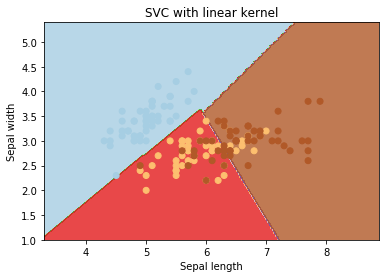

In [10]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# visualize
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
# scatter around..!
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### Q1. `kernel`, `C`, `gamma` parameter들을 바꿔가면서 classification이 어떻게 달라지는지 설명해주세요. 각 최소 3개 variation 시도해보기! (`gamma`에 대해서는 공식 document를 참고하세요!)

In [ ]:
@TODO

### Q2. Application to Real Data  (Cancer classification)

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [13]:
print(cancer.target_names) # classification class
df.columns

['malignant' 'benign']


Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

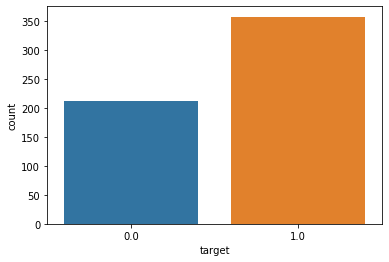

In [15]:
sns.countplot(df['target'], label = "Count")

In [20]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([ # preprocessing at once!
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train = pipeline.fit_transform(X_train) # prepreocessing을 했을 때와 하지 않았을 때 성능 차이가 있나요?
# X_test = pipeline.transform(X_test)

'X' shape: (569, 30)
'y' shape: (569,)


In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 결과 출력 함수
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [22]:
from sklearn.svm import LinearSVC

model = LinearSVC(loss='hinge', dual=True)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 98.99%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    1.000000    0.984190   0.98995    0.992095      0.990109
recall       0.973154    1.000000   0.98995    0.986577      0.989950
f1-score     0.986395    0.992032   0.98995    0.989213      0.989921
support    149.000000  249.000000   0.98995  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[145   4]
 [  0 249]]

Test Result:
Accuracy Score: 97.66%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.968254    0.981481  0.976608    0.974868      0.976608
recall      0.968254    0.981481  0.976608    0.974868      0.976608
f1-score    0.968254    0.981481  0.976608    0.974868      0.976608
support    63.000000  108.000000  0.976608  171.000000    171.00000

/Users/soo._.yonee/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:975: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### `@TODO`  
위에는 linear한 baseline model (Support vector classifier / soft margin classifier)이었고 이제는 kernel을 사용하는 support vector machine입니다! `SVC`의 parameter `kernel`, `gamma`, `C`를 2~3가지로 바꿔보면서 성능차이가 있는지, 있다면 어떠한 경향성을 띠는지 관찰해보세요! 예를 들면 kernel은 linear kernel, polynomial kernel, radial kernel 등이 언급되었었죠...! (Tip : 뭔가 잘 안될때, 처음 써보는 함수일 때, 파라미터 설정이 막힐 때 등등 가장 좋은 방법 중 하나는 패키지의 공식 document와 tutorial을 참고하는 것입니다!) 성능은 Accuracy랑 Confusion matrix 정도만 보셔도 됩니다...!

In [19]:
from sklearn.svm import SVC

# The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials 
model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=5)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 96.98%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.985816    0.961089  0.969849    0.973453      0.970346
recall       0.932886    0.991968  0.969849    0.962427      0.969849
f1-score     0.958621    0.976285  0.969849    0.967453      0.969672
support    149.000000  249.000000  0.969849  398.000000    398.000000
_______________________________________________
Confusion Matrix: 
 [[139  10]
 [  2 247]]

Test Result:
Accuracy Score: 97.08%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0         1.0  accuracy   macro avg  weighted avg
precision   0.967742    0.972477   0.97076    0.970109      0.970733
recall      0.952381    0.981481   0.97076    0.966931      0.970760
f1-score    0.960000    0.976959   0.97076    0.968479      0.970711
support    63.000000  108.000000   0.97076  171.000000    171.00000

In [ ]:
@TODO : Do your own experiment and try to find your best combinations of parameters!!

🔗 reference : https://www.kaggle.com/faressayah/support-vector-machine-pca-tutorial-for-beginner